In [1]:
import pandas as pd
import numpy as np
import pickle
import time

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import spacy
import scispacy
import en_core_sci_lg
from spacy_langdetect import LanguageDetector
from spacy.language import Language

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from gensim import matutils, models
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import scipy.sparse


/Users/crystalhuang/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df=pd.read_csv("./data/clean_df_eng.csv")
df.head()

,cord_uid,source_x,title,doi,abstract,publish_time,authors,journal,url,publish_year,lang
0,gl6kg2gt,WHO,Progress Toward Poliovirus Containment Impleme...,NaN,"Since 1988, when World Health Organization (WH...",2020-01-01,"Moffett, Daphne B; Llewellyn, Anna; Singh, Har...",MMWR Morb Mortal Wkly Rep,NaN,2020,en
1,jjgqnzp6,WHO,Anti)social Monitoring: Law and (or) Expediency?,NaN,The paper is focused on analysis of compliance...,2020-01-01,"Savelyev, Alexander I.",Zakon,NaN,2020,en
2,s5hd55ch,WHO,Running of high patient volume radiation oncol...,NaN,"Purpose: Due to COVID 19 pandemic, the treatme...",2020-01-01,"Gupta, Manoj; Ahuja, Rachit; Gupta, Sweety; Jo...",Radiat. Oncol. J.,NaN,2020,en
3,zl9kf1ax,MedRxiv; WHO,Rapid Development of a De Novo Convalescent Pl...,10.1101/2020.10.23.20217901,BackgroundWith no vaccine or treatment for SAR...,2020-01-01,"Reik, Rita; Gammon, Richard; Carol, Nancy; Smi...",NaN,http://medrxiv.org/cgi/content/short/2020.10.2...,2020,en
4,gzjfyitd,WHO,COVID – 19 and gravid mothers,NaN,Human history is observing a very horrible and...,2020-01-01,"Sadavarte, S.; Chaudhari, B. V.",International Journal of Research in Pharmaceu...,NaN,2020,en


In [3]:
all_texts = df.abstract
len(all_texts)

258961

In [4]:
# spacy nlp model
nlp = en_core_sci_lg.load()
nlp.max_length=3000000

In [5]:
def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

In [11]:
# Vectorize 
vectorizer = CountVectorizer(tokenizer = spacy_tokenizer, min_df=2)
data_vectorized = vectorizer.fit_transform(all_texts)

<AxesSubplot:ylabel='word'>

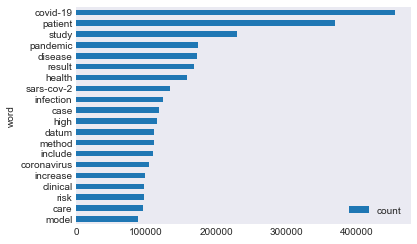

In [15]:
# most frequent words
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 
                           'count': np.asarray(data_vectorized.sum(axis=0))[0]})
word_count.sort_values('count', ascending=False).set_index('word')[:20]\
                .sort_values('count',ascending=True).plot(kind='barh')

In [16]:
pickle.dump(data_vectorized, open("data_vect_final.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer_final.pkl", "wb"))